# **Import Necessary Libraries** 

In [1]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,f1_score
from matplotlib import pyplot as plt
import seaborn as sns

# **Load Data**

In [2]:
wine=load_wine()

# **Feature (Attribute) Names**

In [54]:
df=pd.DataFrame(wine.data,columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# **Target Classes**

In [4]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

# **About DataFrame**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [6]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# **Concatenation**

In [7]:
ser=pd.Series(wine.target)
df1=pd.concat([df,ser],axis=1,join="inner")
df1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# **Renaming the class: Target**

In [8]:
df1.rename(columns={0:"target"},inplace=True)

In [9]:
df1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# **Heatmap of the Correlation Matrix**

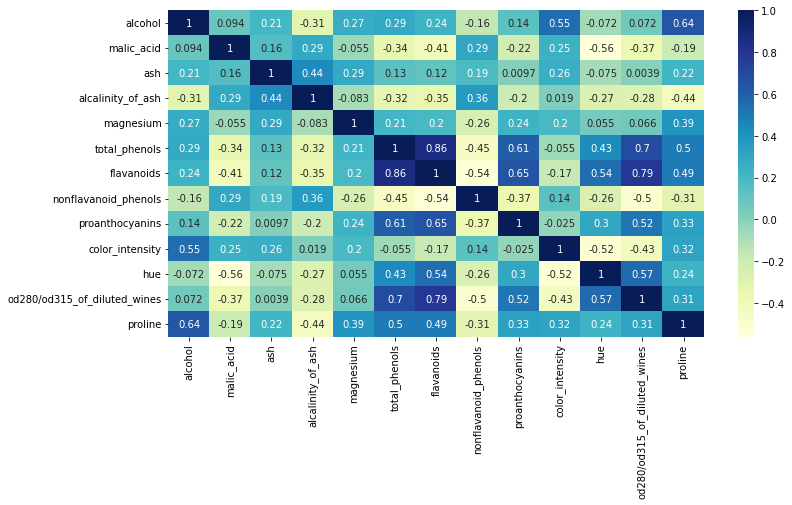

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True , cmap="YlGnBu")

# **X,Y and Train-Test Split**

In [11]:
x=df1.drop(columns="target")
y=df1['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2,stratify=y)

# **Logistic Regression**

In [ ]:
#Logistic Regression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = log_model.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
print("accuracy=",accuracy)


accuracy= 0.9722222222222222


In [ ]:
cls_report=classification_report(y_test,y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



# **K-Nearest Neighbor**

In [37]:
#K-nn 
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_pred = knn.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
print("accuracy=",accuracy)


accuracy= 0.75


In [39]:
cls_report=classification_report(y_test,y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.75      0.64      0.69        14
           2       0.60      0.60      0.60        10

    accuracy                           0.75        36
   macro avg       0.74      0.75      0.74        36
weighted avg       0.74      0.75      0.74        36



# **Decision Tree**

In [ ]:
#Decision Tree 
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt_model.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
print("accuracy=",accuracy)


accuracy= 0.9444444444444444


In [ ]:
cls_report = classification_report(y_test,y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      1.00      0.93        14
           2       1.00      0.80      0.89        10

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



# **Support Vector Machine (SVM)**

## While adapting, you can prefer changing the kernel function (Linear, Polynomial, Sigmoid, RBF etc.)

In [ ]:
#Support Vector Machine (Linear)
from sklearn.svm import SVC
dt_model=SVC(kernel = 'linear')
dt_model.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=dt_model.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
print("accuracy=",accuracy)


accuracy= 0.9444444444444444


In [ ]:
cls_report = classification_report(y_test,y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      1.00      0.93        14
           2       1.00      0.80      0.89        10

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



# **Naïve Bayes**

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
dt_model=GaussianNB()
dt_model.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=dt_model.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
print("accuracy=",accuracy)

accuracy= 0.9722222222222222


In [ ]:
cls_report = classification_report(y_test,y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



## **Choose the best number of estimators for Random Forest Classifier**

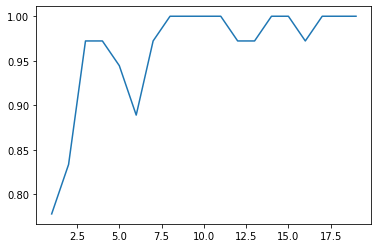

In [41]:
n_estimators = range(1,20)
accuracy_scores = []
for i in n_estimators:
  dt_model = RandomForestClassifier(i)
  dt_model.fit(x_train,y_train)
  y_pred=dt_model.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  accuracy_scores.append(accuracy)

plt.plot(n_estimators,accuracy_scores)
plt.show()

# **Random Forest**

In [51]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
dt_model = RandomForestClassifier(n_estimators=8)
dt_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=8)

In [52]:
y_pred=dt_model.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
print("accuracy=",accuracy)

accuracy= 0.9444444444444444


In [53]:
cls_report = classification_report(y_test,y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.86      0.92        14
           2       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36

